In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from category_encoders import OrdinalEncoder

In [2]:
# load file
data = pd.read_csv('shopping_behavior_updated.csv')
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 3900


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
# data cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

There is no missing value in the dataset.

In [4]:
# data exploration

# Get list of categorical variables
objs = (data.dtypes == 'object')
object_cols = list(objs[objs].index)
print("Categorical variables:")
print(object_cols)


Categorical variables:
['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']


In [5]:
# Get a look
print(data['Gender'].value_counts())
print('----------------------------------')
print(data['Item Purchased'].value_counts())
print('----------------------------------')
print(data['Category'].value_counts())
print('----------------------------------')
print(data['Location'].value_counts())
print('----------------------------------')
print(data['Size'].value_counts())
print('----------------------------------')
print(data['Color'].value_counts())
print('----------------------------------')
print(data['Season'].value_counts())
print('----------------------------------')
print(data['Subscription Status'].value_counts())
print('----------------------------------')
print(data['Shipping Type'].value_counts())
print('----------------------------------')
print(data['Discount Applied'].value_counts())
print('----------------------------------')
print(data['Promo Code Used'].value_counts())
print('----------------------------------')
print(data['Payment Method'].value_counts())
print('----------------------------------')
print(data['Frequency of Purchases'].value_counts())

Gender
Male      2652
Female    1248
Name: count, dtype: int64
----------------------------------
Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64
----------------------------------
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64
----------------------------------
Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delawar

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

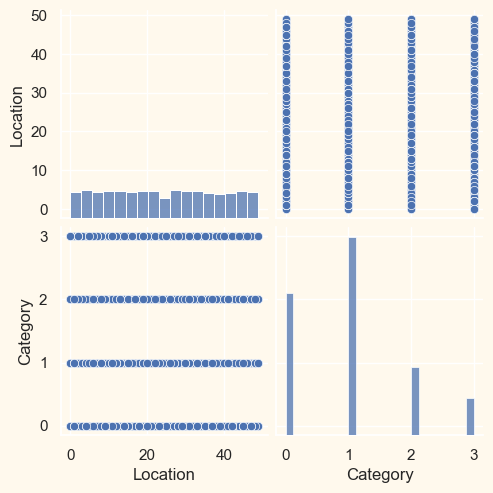

In [6]:
le=LabelEncoder()
data['Location'] = le.fit_transform(data['Location'])
data['Category'] = le.fit_transform(data['Category'])
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Location", "Category"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot])
#Taking hue 
plt.show()

Promo Code Used is the same as discount applied. So we can drop one of them.\
Features with level:'Subscription Status','Shipping Type', 'Discount Applied','Payment Method', 'Frequency of Purchases'\
Features 'Location' does not have noteworthy correlation with goods,and its one-hot coding will be large,so drop it.\

In [7]:
# Drop some columns
to_drop = ['Promo Code Used', 'Customer ID', 'Location']
data.drop(to_drop, axis=1, inplace=True)
object_cols.remove('Promo Code Used')
object_cols.remove('Location')

In [8]:
# encoding

# with level,ordinal encoding
ord_map1 = {'No':0, 'Yes':1}
ord_map2 = {'Store Pickup':0, 'Free Shipping':0, 'Standard':1,'2-Day Shipping':2,'Express':3,'Next Day Air':4}
ord_map3 = {'No':1, 'Yes':0}
ord_map4 = {'Debit Card':0,'Credit Card':0, 'PayPal':1, 'Bank Transfer':2, 'Cash':2,'Venmo':2}
ord_map5 = {'Annually':1, 'Quarterly':2,'Every 3 Months':3,'Monthly':4,'Fortnightly':5,'Bi-Weekly':5,'Weekly':6}
ord_map6 = {'S':1,'M':2,'L':3,'XL':4}

data['Subscription Status'] = data['Subscription Status'].map(ord_map1)
data['Shipping Type'] = data['Shipping Type'].map(ord_map2)
data['Discount Applied'] = data['Discount Applied'].map(ord_map3)
data['Payment Method'] = data['Payment Method'].map(ord_map4)
data['Frequency of Purchases'] = data['Frequency of Purchases'].map(ord_map5)
data['Size'] = data['Size'].map(ord_map6)
data.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,1,53,3,Gray,Winter,3.1,1,3,0,14,2,5
1,19,Male,Sweater,1,64,3,Maroon,Winter,3.1,1,3,0,2,2,5
2,50,Male,Jeans,1,73,1,Maroon,Spring,3.1,1,0,0,23,0,6
3,21,Male,Sandals,2,90,2,Maroon,Spring,3.5,1,4,0,49,1,6
4,45,Male,Blouse,1,49,2,Turquoise,Spring,2.7,1,0,0,31,1,1


In [9]:
# without level, one-hot encoding
print(object_cols)
object_cols.remove('Subscription Status')
object_cols.remove('Shipping Type')
object_cols.remove('Discount Applied')
object_cols.remove('Payment Method')
object_cols.remove('Frequency of Purchases')
object_cols.remove('Size')
print(object_cols)
for i in object_cols:
    data = pd.concat([data,pd.get_dummies(data[i],prefix=i,dtype=int)],axis=1)
    data.drop(i,axis=1,inplace=True)

data.head()

['Gender', 'Item Purchased', 'Category', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Payment Method', 'Frequency of Purchases']
['Gender', 'Item Purchased', 'Category', 'Color', 'Season']


,Age,Purchase Amount (USD),Size,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases,...,Color_Silver,Color_Teal,Color_Turquoise,Color_Violet,Color_White,Color_Yellow,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,55,53,3,3.1,1,3,0,14,2,5,...,0,0,0,0,0,0,0,0,0,1
1,19,64,3,3.1,1,3,0,2,2,5,...,0,0,0,0,0,0,0,0,0,1
2,50,73,1,3.1,1,0,0,23,0,6,...,0,0,0,0,0,0,0,1,0,0
3,21,90,2,3.5,1,4,0,49,1,6,...,0,0,0,0,0,0,0,1,0,0
4,45,49,2,2.7,1,0,0,31,1,1,...,0,0,1,0,0,0,0,1,0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3900 non-null   int64  
 1   Purchase Amount (USD)      3900 non-null   int64  
 2   Size                       3900 non-null   int64  
 3   Review Rating              3900 non-null   float64
 4   Subscription Status        3900 non-null   int64  
 5   Shipping Type              3900 non-null   int64  
 6   Discount Applied           3900 non-null   int64  
 7   Previous Purchases         3900 non-null   int64  
 8   Payment Method             3900 non-null   int64  
 9   Frequency of Purchases     3900 non-null   int64  
 10  Gender_Female              3900 non-null   int32  
 11  Gender_Male                3900 non-null   int32  
 12  Item Purchased_Backpack    3900 non-null   int32  
 13  Item Purchased_Belt        3900 non-null   int32